In [56]:
import pandas as pd

df = pd.read_csv('data/listings_cleaned.csv')


Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores

In [57]:
df= df.drop(columns=['host_location', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'calendar_updated', 'license'])

In [58]:
df.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       '

In [59]:
df.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2595.0,Skylit Midtown Castle Sanctuary,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,9/9/08,within a day,90%,21%,f,...,4.68,4.73,4.63,4.77,4.80,4.81,4.40,f,3,0.27
1,6848.0,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,15991,5/6/09,within a few hours,100%,100%,t,...,4.58,4.59,4.85,4.85,4.80,4.69,4.58,f,1,1.04
2,6872.0,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,16104,5/7/09,a few days or more,30%,33%,f,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,2,0.03
3,6990.0,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",16800,5/12/09,within an hour,100%,100%,t,...,4.88,4.83,4.95,4.96,4.95,4.85,4.85,f,1,1.37
4,7064.0,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",17297,5/15/09,NaN,NaN,0%,f,...,4.91,5.00,4.91,5.00,5.00,5.00,5.00,f,2,0.08


In [60]:
df.to_csv('data/listings_cleansed_pi.csv')

In [62]:
pd.set_option('display.max_rows', None)
df['amenities']

0        ["Fire extinguisher", "Smoke alarm", "Stove", ...
1        ["Fire extinguisher", "Smoke alarm", "Stove", ...
2        ["Heating", "Washer", "Fire extinguisher", "Sm...
3        ["Fire extinguisher", "Smoke alarm", "Stove", ...
4        ["Heating", "Washer", "Dishes and silverware",...
5        ["Fire extinguisher", "Smoke alarm", "Private ...
6        ["Fire extinguisher", "Board games", "Smoke al...
7        ["Board games", "Private patio or balcony", "B...
8        ["Fire extinguisher", "Smoke alarm", "Gas stov...
9        ["Lock on bedroom door", "Smoke alarm", "Stove...
10       ["Heating", "Washer", "Air conditioning", "Bre...
11       ["Lock on bedroom door", "Smoke alarm", "Stove...
12       ["Smoke alarm", "Stove", "Air conditioning", "...
13       ["Lock on bedroom door", "Smoke alarm", "Fire ...
14       ["Fire extinguisher", "Smoke alarm", "Stove", ...
15       ["Smoke alarm", "Paid parking off premises", "...
16       ["Heating", "Lock on bedroom door", "Stove", ".

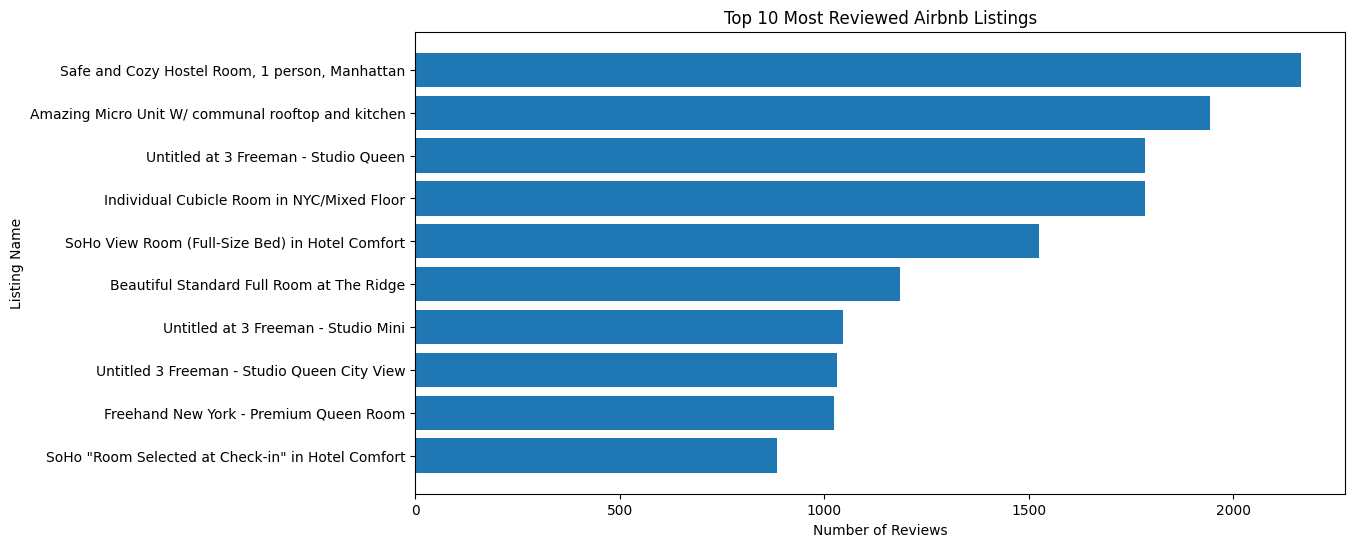

In [65]:
import matplotlib.pyplot as plt

# Top 10 listings based on reviews
top_listings = df.nlargest(10, 'number_of_reviews')

plt.figure(figsize=(12, 6))
plt.barh(top_listings['name'], top_listings['number_of_reviews'])
plt.xlabel('Number of Reviews')
plt.ylabel('Listing Name')
plt.title('Top 10 Most Reviewed Airbnb Listings')
plt.gca().invert_yaxis()
plt.show()

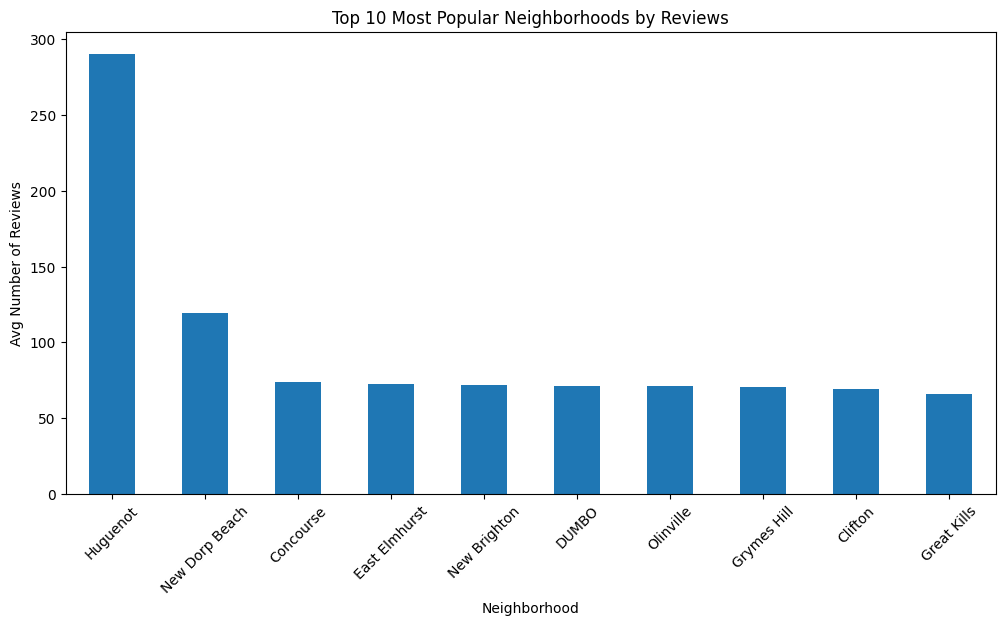

In [66]:
# Popularity by neighborhood

# Group by neighborhood and calculate the mean number of reviews
neighborhood_reviews = df.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
neighborhood_reviews.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Avg Number of Reviews')
plt.title('Top 10 Most Popular Neighborhoods by Reviews')
plt.xticks(rotation=45)
plt.show()